# This script contains the following:
Importing libraries and data and wrangling dataframe
The elbow technique
k-means clustering

# 1. Importing Libraries, Data Frame, and Wrangling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
#Import Data
# Import data- totals with percent changes
df = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/chlamydia.pkl')
df

,State,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,Alabama,1996,8283,4331102.0,517.687500,0.000000,0.000000,191.244630
1,Alabama,1997,8704,4367935.0,435.200000,0.008504,0.050827,199.270365
2,Alabama,1998,10065,4404701.0,503.250000,0.008417,0.156365,228.505862
3,Alabama,1999,12375,4430141.0,538.043478,0.005776,0.229508,279.336482
4,Alabama,2000,15323,4451975.0,638.458333,0.004929,0.238222,344.184323
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,2113,563626.0,150.928571,0.035563,0.076414,374.893990
965,Wyoming,2011,2092,568158.0,139.466667,0.008041,-0.009938,368.207435
966,Wyoming,2012,2102,576412.0,150.142857,0.014528,0.004780,364.669715
967,Wyoming,2013,2005,523588.0,133.666667,-0.091643,-0.046147,382.934674


In [4]:
#drop non-numerical columns and columns needed to revise
df.drop(['State'], axis=1, inplace = True)
df

,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,1996,8283,4331102.0,517.687500,0.000000,0.000000,191.244630
1,1997,8704,4367935.0,435.200000,0.008504,0.050827,199.270365
2,1998,10065,4404701.0,503.250000,0.008417,0.156365,228.505862
3,1999,12375,4430141.0,538.043478,0.005776,0.229508,279.336482
4,2000,15323,4451975.0,638.458333,0.004929,0.238222,344.184323
...,...,...,...,...,...,...,...
964,2010,2113,563626.0,150.928571,0.035563,0.076414,374.893990
965,2011,2092,568158.0,139.466667,0.008041,-0.009938,368.207435
966,2012,2102,576412.0,150.142857,0.014528,0.004780,364.669715
967,2013,2005,523588.0,133.666667,-0.091643,-0.046147,382.934674


In [5]:
#set Nan and inf to 0
df = df.fillna(0).replace([np.inf, -np.inf], 0)
df

,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,1996,8283,4331102.0,517.687500,0.000000,0.000000,191.244630
1,1997,8704,4367935.0,435.200000,0.008504,0.050827,199.270365
2,1998,10065,4404701.0,503.250000,0.008417,0.156365,228.505862
3,1999,12375,4430141.0,538.043478,0.005776,0.229508,279.336482
4,2000,15323,4451975.0,638.458333,0.004929,0.238222,344.184323
...,...,...,...,...,...,...,...
964,2010,2113,563626.0,150.928571,0.035563,0.076414,374.893990
965,2011,2092,568158.0,139.466667,0.008041,-0.009938,368.207435
966,2012,2102,576412.0,150.142857,0.014528,0.004780,364.669715
967,2013,2005,523588.0,133.666667,-0.091643,-0.046147,382.934674


# The Elbow Technique

In [6]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [7]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

/Users/joshd/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshd/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshd/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshd/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/j

[-3.993911408985042e+16,
 -1.3591842198505556e+16,
 -6863430872549728.0,
 -3540367067390018.0,
 -1625689171047213.8,
 -1134386235983966.0,
 -797413226299498.9,
 -536289980009885.44,
 -420726440280475.06]

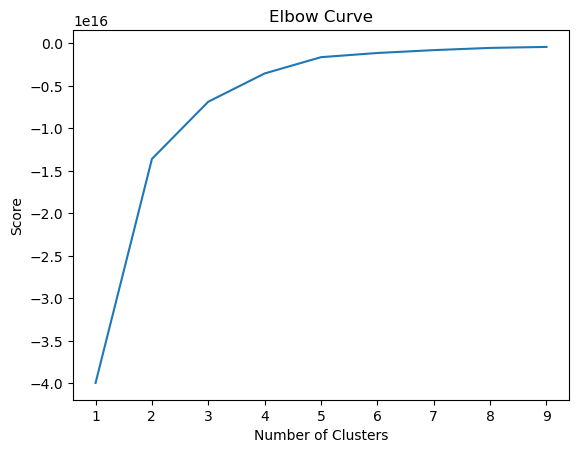

In [8]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curves at 3, so I will use that value

## K-means clustering

In [9]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_init = 1)

In [10]:
kmeans.fit(df)

KMeans(n_clusters=3, n_init=1)

In [11]:
df['clusters'] = kmeans.fit_predict(df)

In [12]:
df.head()

,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K,clusters
0,1996,8283,4331102.0,517.687500,0.000000,0.000000,191.244630,0
1,1997,8704,4367935.0,435.200000,0.008504,0.050827,199.270365,0
2,1998,10065,4404701.0,503.250000,0.008417,0.156365,228.505862,0
3,1999,12375,4430141.0,538.043478,0.005776,0.229508,279.336482,0
4,2000,15323,4451975.0,638.458333,0.004929,0.238222,344.184323,0


In [13]:
df['clusters'].value_counts()

0    597
2    306
1     66
Name: clusters, dtype: int64

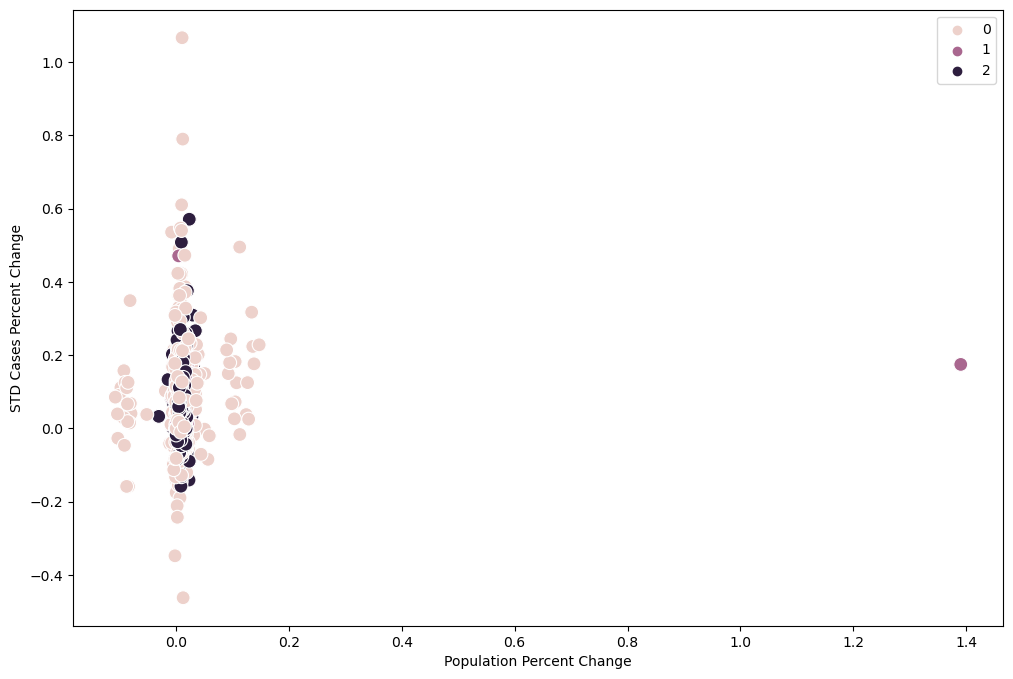

In [14]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Population Percent Change'], y=df['STD Cases Percent Change'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population Percent Change') # Label x-axis.
plt.ylabel('STD Cases Percent Change') # Label y-axis.
plt.show()

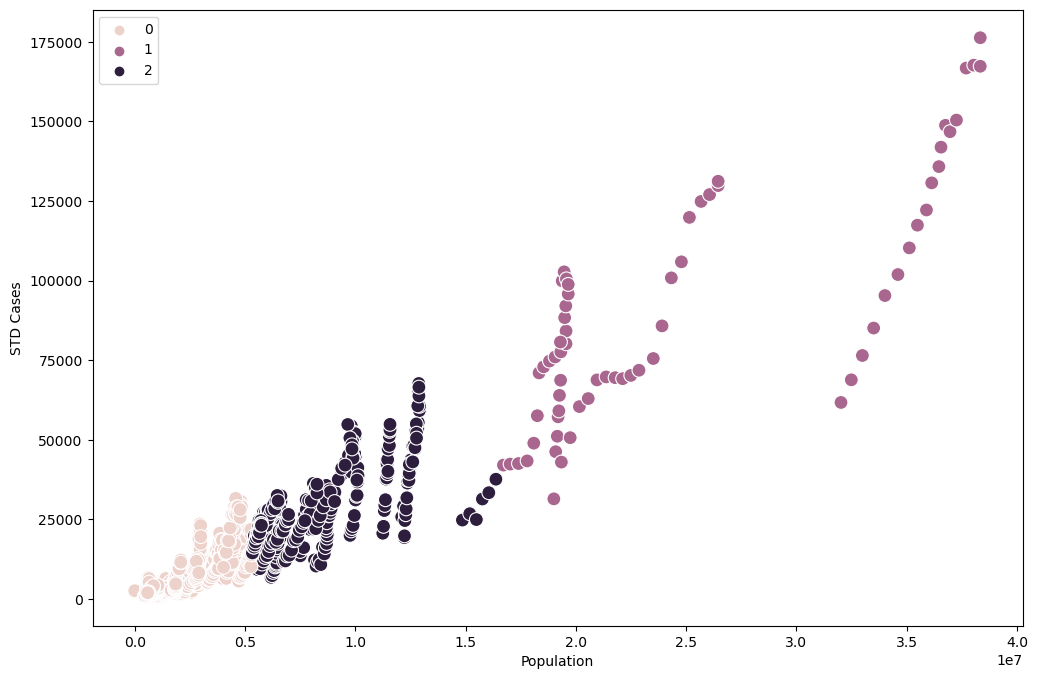

In [15]:
# Plot the clusters for the "Population" and "STD Cases" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Population'], y=df['STD Cases'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Population') 
plt.ylabel('STD Cases') 
plt.show()

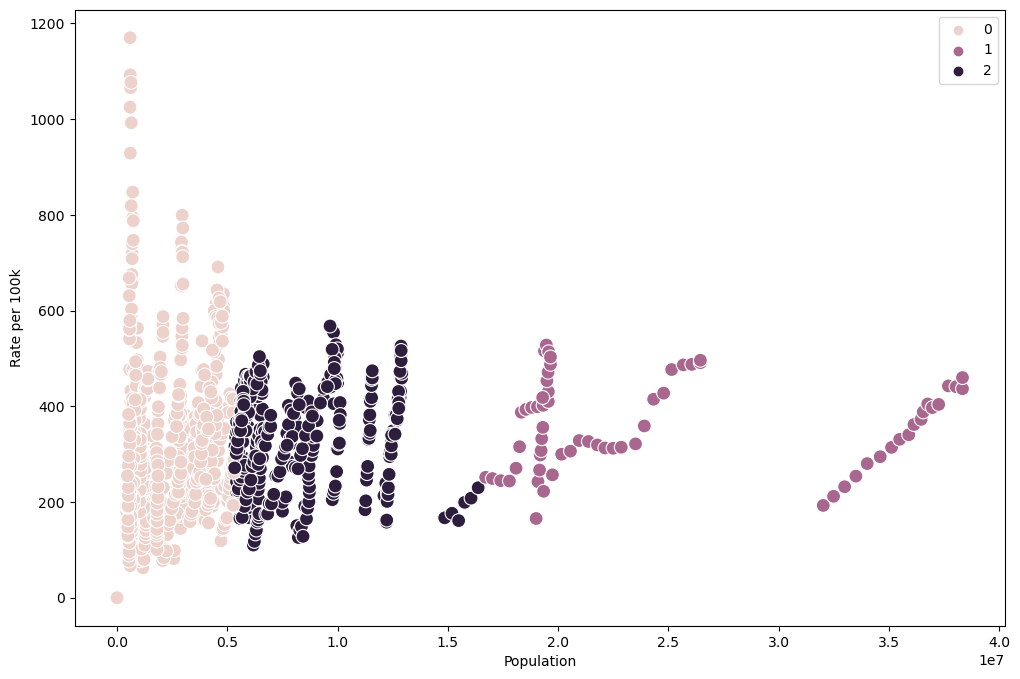

In [16]:
# Plot the clusters for the "Population" and "Rate per 100K" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Population'], y=df['Rate per 100K'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Population') 
plt.ylabel('Rate per 100k') 
plt.show()

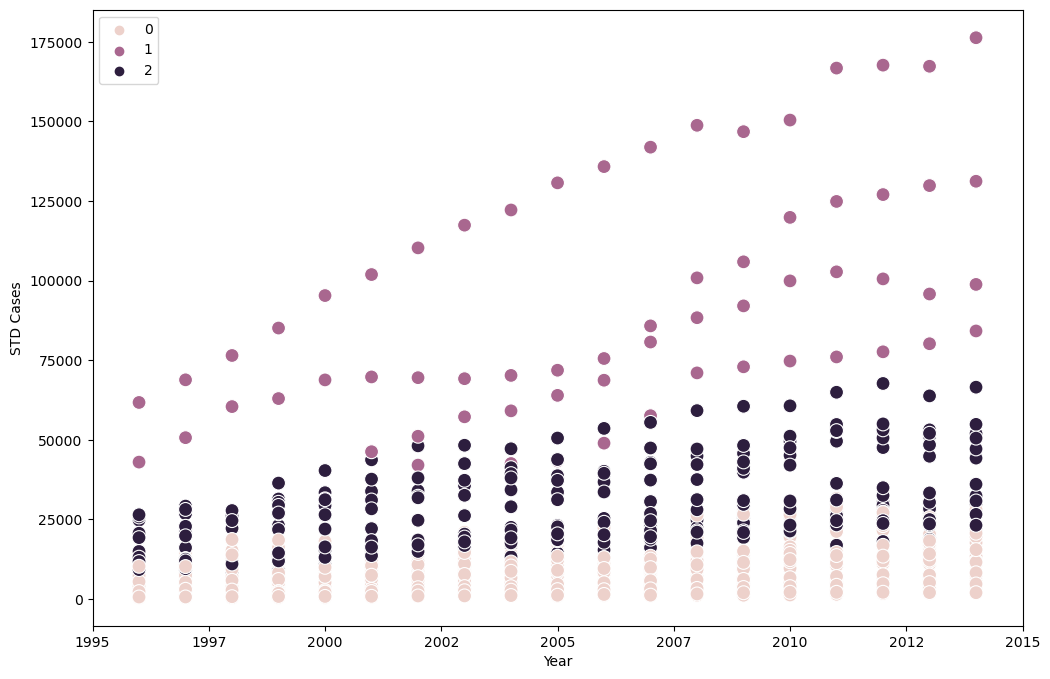

In [17]:
# Plot the clusters for the "Year" and "STD Cases" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['STD Cases'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year')
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.ylabel('STD Cases') 
plt.show()

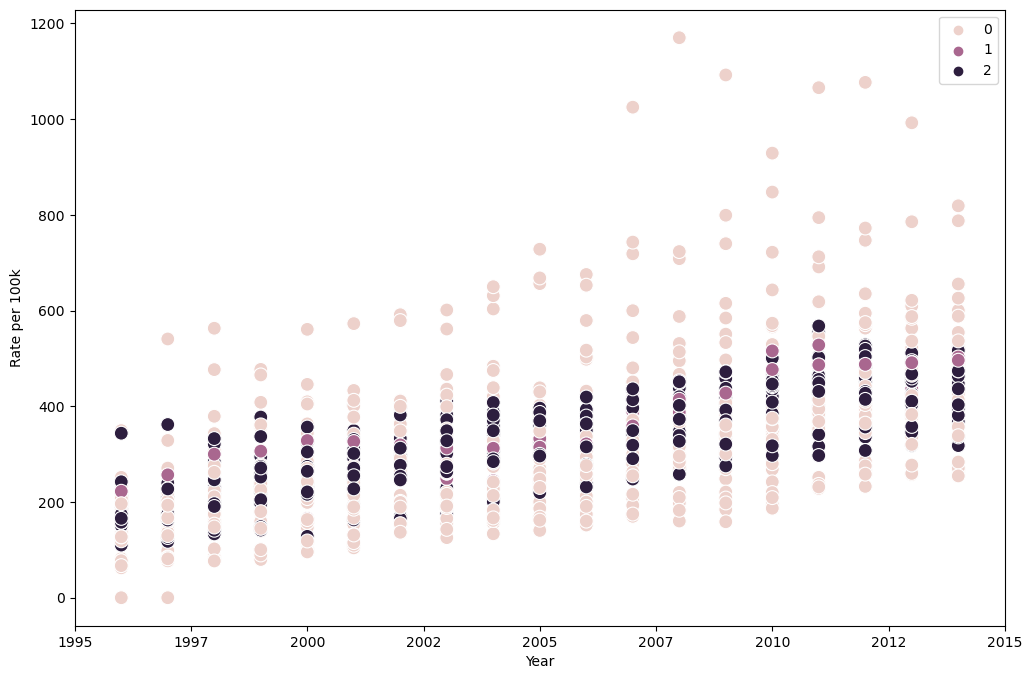

In [18]:
# Plot the clusters for the "Year" and "Rate per 100k" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Rate per 100K'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year')
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.ylabel('Rate per 100k') 
plt.show()

It is interesting to see the realtionships on a combined State level. The frist scatterplot does not give much information. The "Population" and "STD Cases" are very interesting, particualy the purple category with the much higher values in both population and cases.  Same with the dark purple and the "Population" and "Rate per 100K"  as the STD Rates seem disroportinally higher as the population increases.   While the "Year" and "STD Cases" chart also shows a larger incrase in the later years, with the dark purple and the black showing an upwards trends of cases.  The "Year" and "Rate per 100k" did not show much clustering, save around the years, but 100k rate incrased each year with 2012+ showing very few or no rates below 250. 

In [19]:
#Define cluster
df.loc[df['clusters'] == 0, 'cluster'] = 'Pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'Purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'Black'
df

,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K,clusters,cluster
0,1996,8283,4331102.0,517.687500,0.000000,0.000000,191.244630,0,Pink
1,1997,8704,4367935.0,435.200000,0.008504,0.050827,199.270365,0,Pink
2,1998,10065,4404701.0,503.250000,0.008417,0.156365,228.505862,0,Pink
3,1999,12375,4430141.0,538.043478,0.005776,0.229508,279.336482,0,Pink
4,2000,15323,4451975.0,638.458333,0.004929,0.238222,344.184323,0,Pink
...,...,...,...,...,...,...,...,...,...
964,2010,2113,563626.0,150.928571,0.035563,0.076414,374.893990,0,Pink
965,2011,2092,568158.0,139.466667,0.008041,-0.009938,368.207435,0,Pink
966,2012,2102,576412.0,150.142857,0.014528,0.004780,364.669715,0,Pink
967,2013,2005,523588.0,133.666667,-0.091643,-0.046147,382.934674,0,Pink


In [20]:
#Group by Cluster
df.groupby('cluster').agg({'STD Cases':['mean', 'median'], 
                         'Population Percent Change':['mean', 'median'], 
                         'STD Cases Percent Change':['mean', 'median'],
                          'Rate per 100K':['mean', 'median']})

STD Cases          Population Percent Change            \
                 mean   median                      mean    median   
cluster                                                              
Black    27503.705882  24747.5                  0.007571  0.006842   
Pink      7730.770519   5608.0                  0.008448  0.006905   
Purple   90300.909091  80449.5                  0.031825  0.011968   

        STD Cases Percent Change           Rate per 100K              
                            mean    median          mean      median  
cluster                                                               
Black                   0.057147  0.048190    331.323537  335.846029  
Pink                    0.070446  0.052438    324.394513  286.528103  
Purple                  0.069514  0.046661    360.178943  357.409807

On an aggragated state level the clusters point to more cases and more STD percent change with the Black. I think the black yeields the most value as it shows a cluster of higher values.  It might be useful to run again with the individual diseases to see how they differ to each other and what trends they follow. 